In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


In [2]:
csv_file_name = "Crime in Bangladesh.csv"

In [3]:
df = pd.read_csv( csv_file_name )
df.head(5)

Year Unit_Name  Dacoity  Robber  Murder  Speedy Trial  Riot  \
0  2010       DMP       47     220     245           363     3   
1  2010       CMP       16     108      94            31     7   
2  2010       KMP        3       9      29            25     0   
3  2010       RMP        4      20      21             9    15   
4  2010       BMP        8      12      19            21     0   

   Women&Children_Represion  Kidnapping  Police_Assult  Burglary  Theft  \
0                      1370         139            155       555   1915   
1                       455          37             31       123    314   
2                       153          11              4        65     91   
3                       157           9             12        53    106   
4                       112           6              8        24     83   

   Other_cases  Arms_act  Explosive_act  Narcotic_act  Smuggling  \
0         7228       518             82         10535        144   
1         1831        51              0           866         99   
2          551        19              2           792         13   
3          578         3              4           332        248   
4          557        17              0           155        117   

   Tot(arm+exp+nar+smu)  Total  
0                 11279  23519  
1                  1016   4063  
2                   826   1767  
3                   587   1571  
4                   289   1139

In [4]:
categorical_target_column = True
#categorical_target_column = False

In [5]:


target_column_name = "Unit_Name"

In [6]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 180
Total Number of Columns : 19


In [7]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

Unit_Name
DMP                 10
CMP                 10
RPMP                10
GMP                 10
Railway Range       10
Rangpur Range       10
Rajshahi Range      10
Barisal Range       10
Khulna Range        10
Sylhet Range        10
Chittagong Range    10
Mymensingh Range    10
Dhaka Range         10
SMP                 10
BMP                 10
RMP                 10
KMP                 10
ATU                 10
Name: count, dtype: int64


OBSERVATION:

here this data set is properly distributed.
there is 10 data for every Unit_Name


Total Number of Rows : 180
Total Number of Columns : 20

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

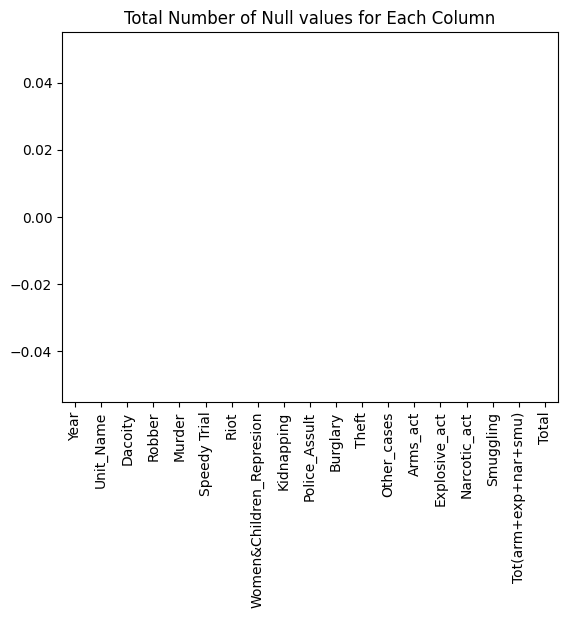

In [8]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")

Ohhhhhhhhh. its a nice news to us that there is no NULL value in our data set


In [9]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    100.0
Name: count, dtype: float64


There are 0% duplicate entries in this data set

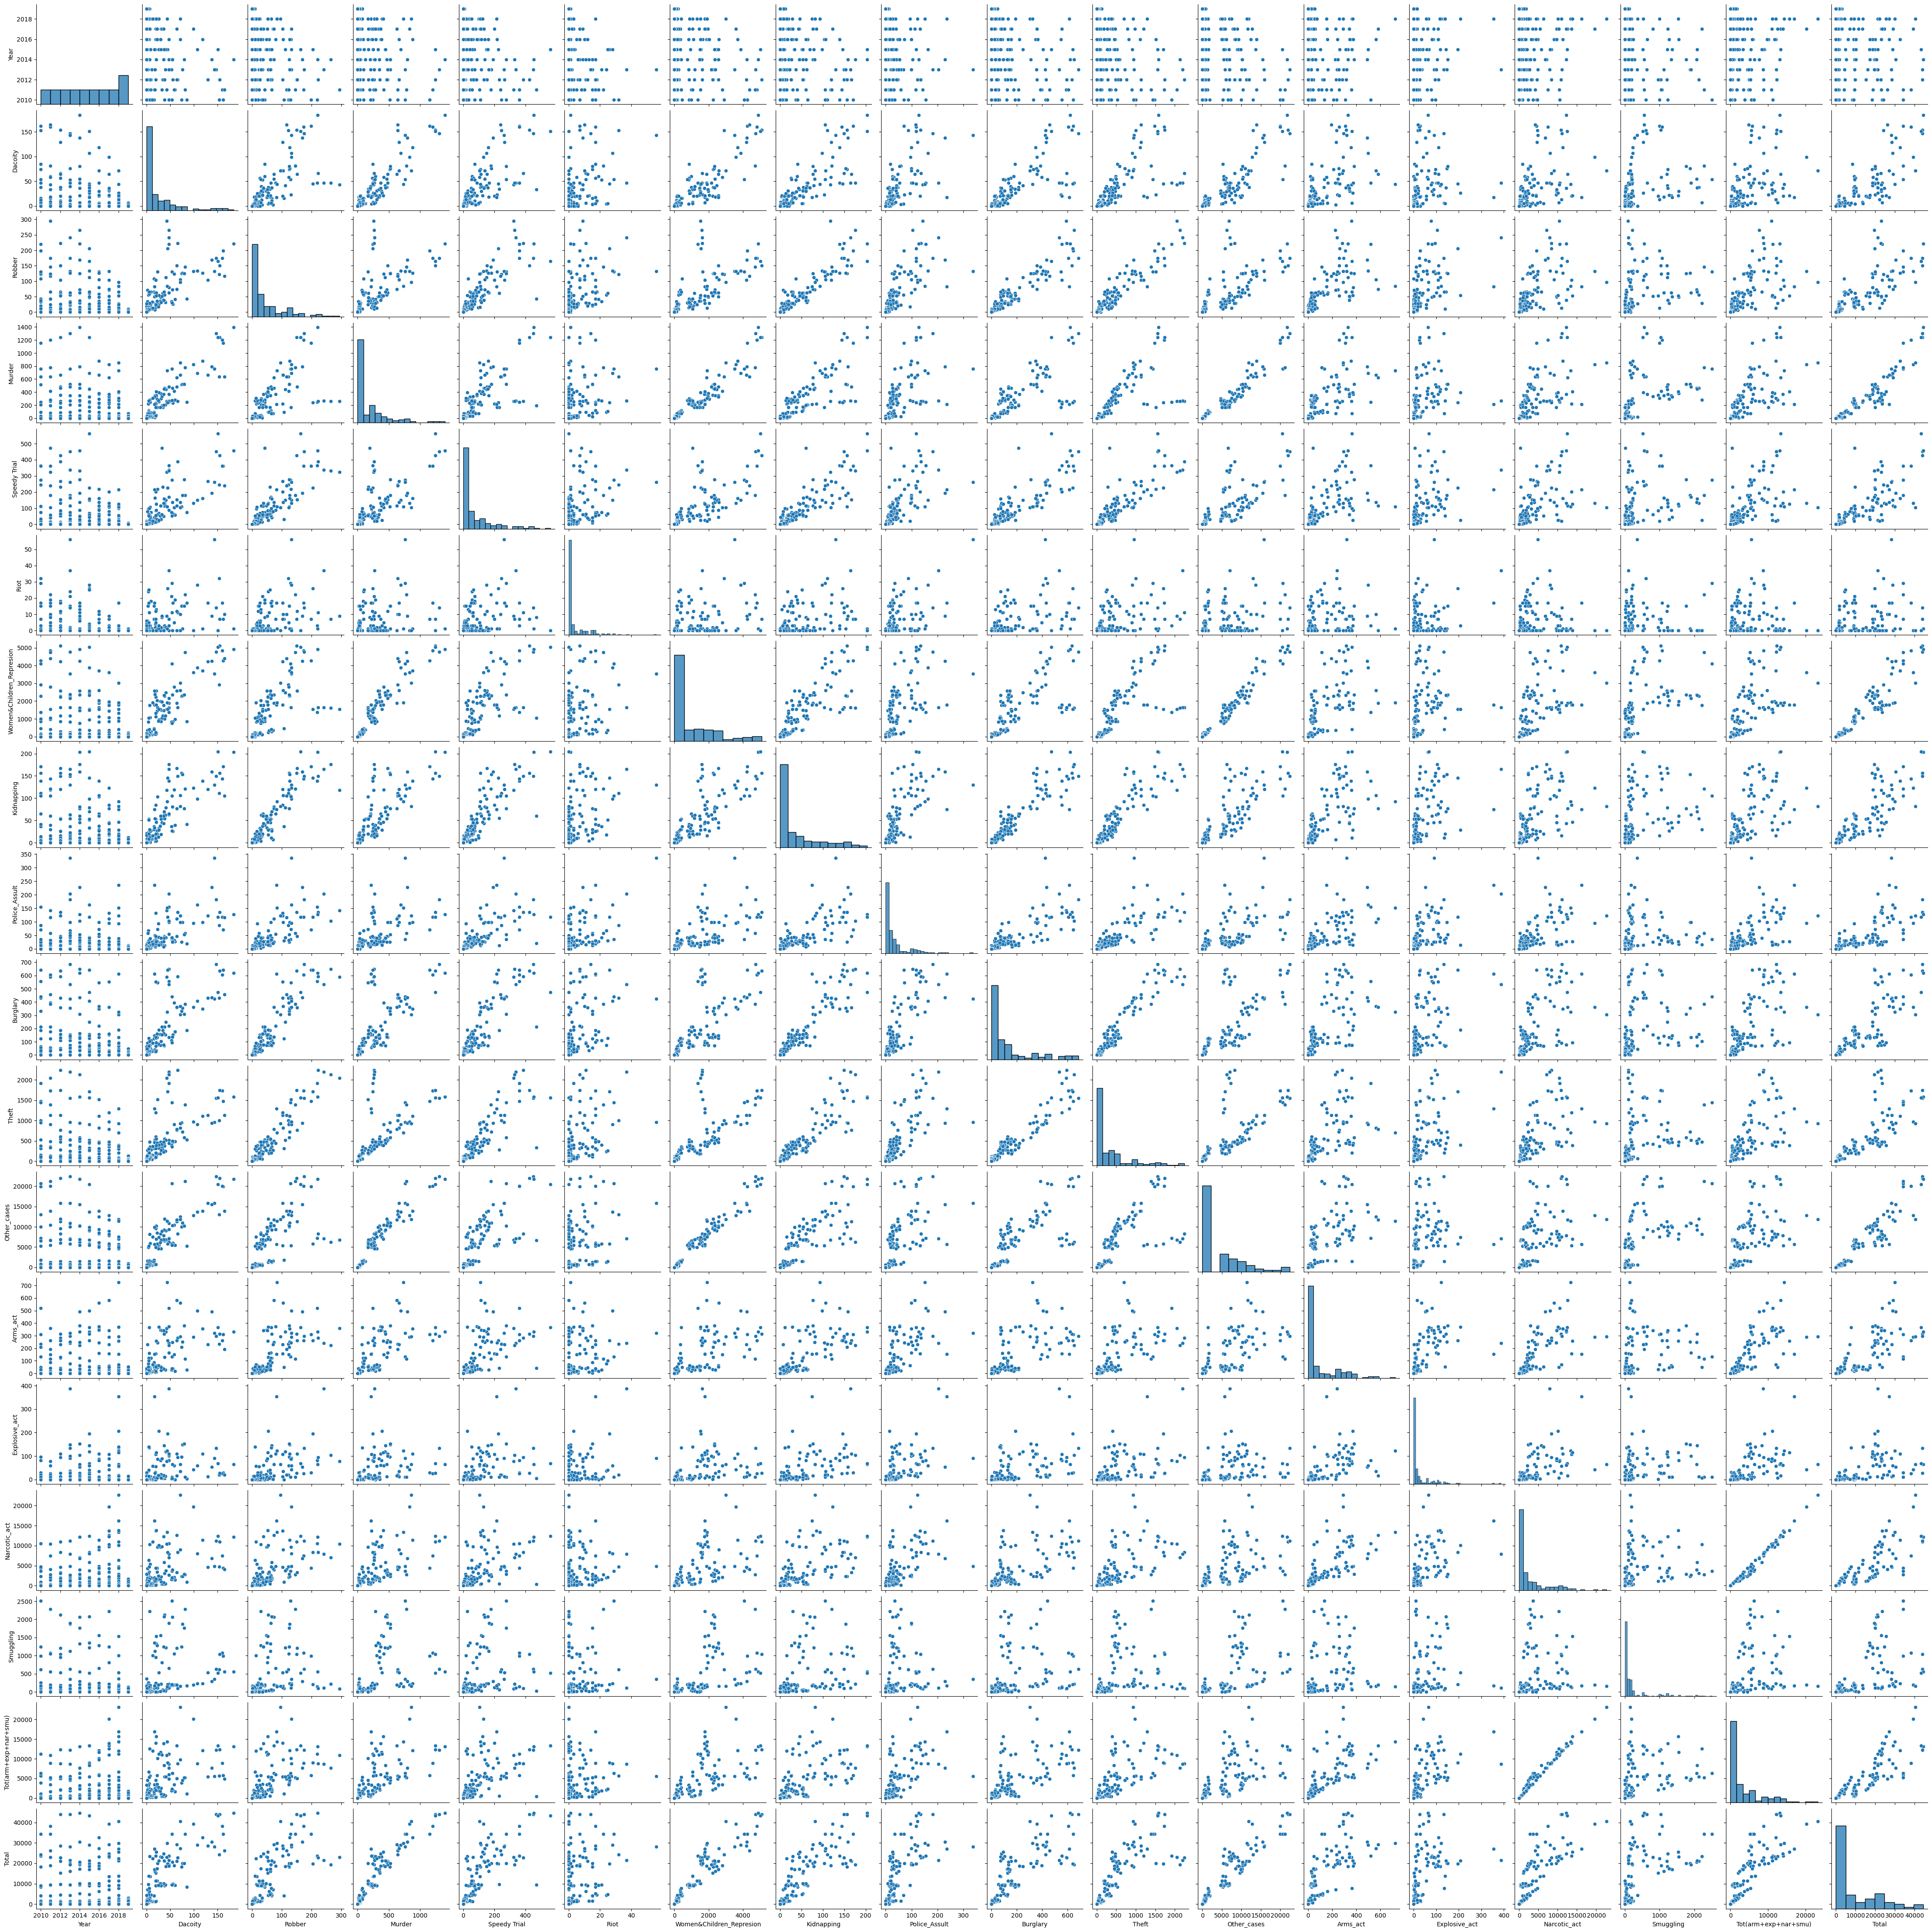

In [10]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

OBSERVATION
---
From the pair plot above some of the observations are :-

Dacoity:  In this dataset the data points from Dacoity column are highly right skewed. It can be observed that Fewer robberies occurred in many areas.

All others are similar like Dacoity. That is, more occurrences occur in fewer areas and fewer occurrences occur in more areas

In [11]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      180 non-null    int64 
 1   Unit_Name                 180 non-null    object
 2   Dacoity                   180 non-null    int64 
 3   Robber                    180 non-null    int64 
 4   Murder                    180 non-null    int64 
 5   Speedy Trial              180 non-null    int64 
 6   Riot                      180 non-null    int64 
 7   Women&Children_Represion  180 non-null    int64 
 8   Kidnapping                180 non-null    int64 
 9   Police_Assult             180 non-null    int64 
 10  Burglary                  180 non-null    int64 
 11  Theft                     180 non-null    int64 
 12  Other_cases               180 non-null    int64 
 13  Arms_act                  180 non-null    int64 
 14  Explosive_act             

Year                         10
Unit_Name                    18
Dacoity                      66
Robber                       85
Murder                      109
Speedy Trial                 93
Riot                         29
Women&Children_Represion    132
Kidnapping                   75
Police_Assult                71
Burglary                    106
Theft                       130
Other_cases                 146
Arms_act                     94
Explosive_act                63
Narcotic_act                145
Smuggling                   111
Tot(arm+exp+nar+smu)        144
Total                       147
dtype: int64

In [12]:
categorical_columns = ["Unit_Name" , "Year" ]
numeric_columns=["Dacoity",	"Robber",	"Murder",	"Speedy Trial	Riot",	"Women&Children_Represion	Kidnapping",	"Police_Assult",	"Burglary",	"Theft", 	"Other_cases",	"Arms_act",	"Explosive_act",	"Narcotic_act",	"Smuggling",	"Tot(arm+exp+nar+smu)"	,"Total"]

In [13]:

numeric_columns

['Dacoity',
 'Robber',
 'Murder',
 'Speedy Trial\tRiot',
 'Women&Children_Represion\tKidnapping',
 'Police_Assult',
 'Burglary',
 'Theft',
 'Other_cases',
 'Arms_act',
 'Explosive_act',
 'Narcotic_act',
 'Smuggling',
 'Tot(arm+exp+nar+smu)',
 'Total']

In [14]:

categorical_columns

['Unit_Name', 'Year']

In [16]:
target_column_name

'Unit_Name'

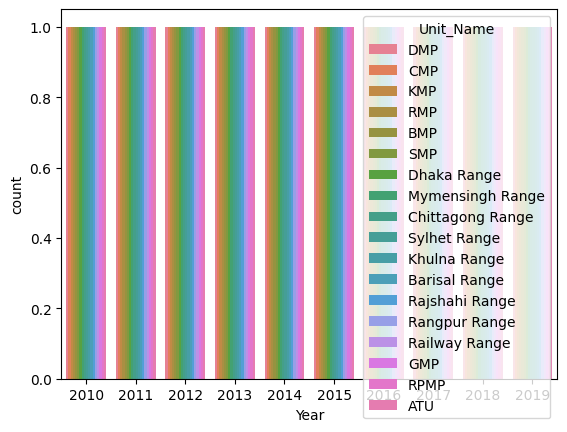

In [17]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      #sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()

OBSERVATION

Since the data set is evenly distributed, there is an equal number of crimes per unit name per year.

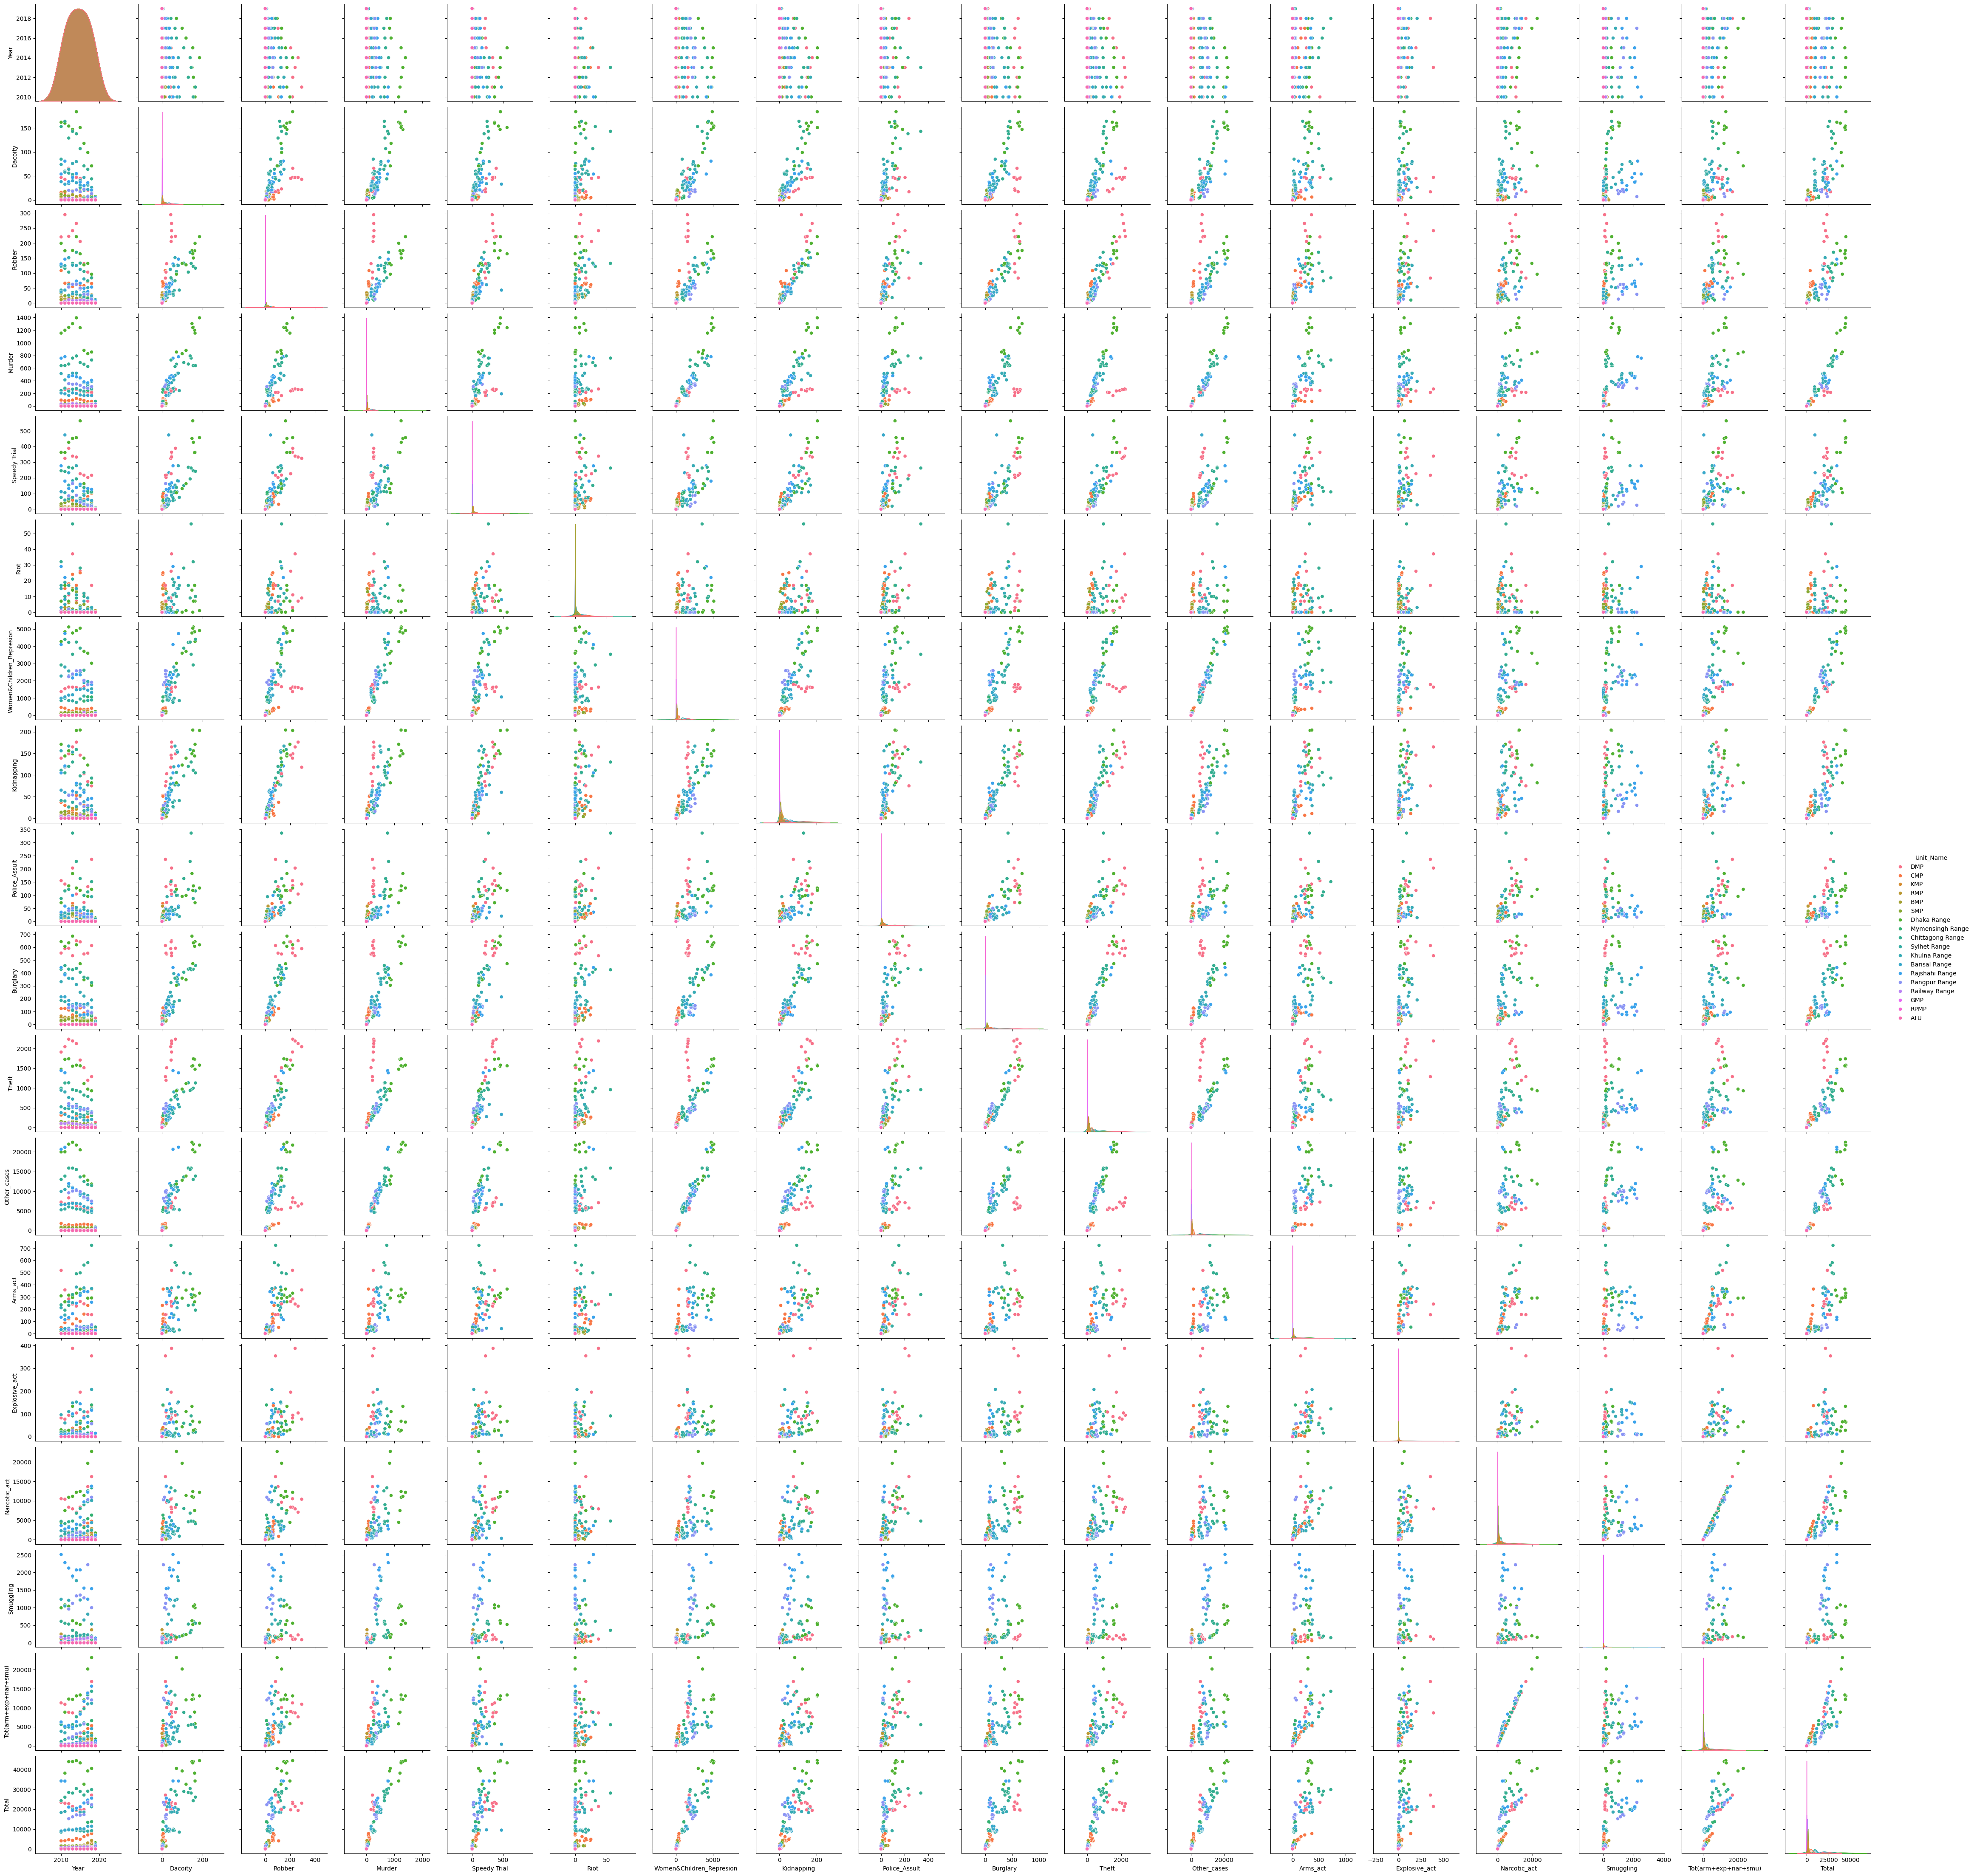

In [18]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      180 non-null    int64 
 1   Unit_Name                 180 non-null    object
 2   Dacoity                   180 non-null    int64 
 3   Robber                    180 non-null    int64 
 4   Murder                    180 non-null    int64 
 5   Speedy Trial              180 non-null    int64 
 6   Riot                      180 non-null    int64 
 7   Women&Children_Represion  180 non-null    int64 
 8   Kidnapping                180 non-null    int64 
 9   Police_Assult             180 non-null    int64 
 10  Burglary                  180 non-null    int64 
 11  Theft                     180 non-null    int64 
 12  Other_cases               180 non-null    int64 
 13  Arms_act                  180 non-null    int64 
 14  Explosive_act             

<Axes: >

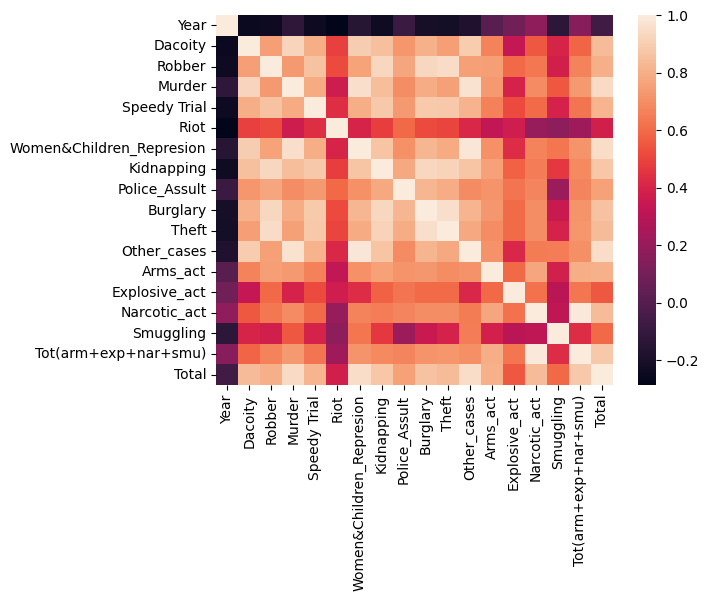

In [20]:
sns.heatmap(df.corr( numeric_only =  True))

OBSERVATION
---
Some of the highest positive correlations are between Women&Children_Repression and Kidnapping, Dacoity and Robber, and Murder and Speedy Trial. This means that these types of crimes tend to occur together or increase together.
Some of the lowest or negative correlations are between Other_cases and Tot(arm+exp+nar+smu) , Police_Assult and Encoded_Total , and Burglary and Arms_act. This means that these types of crimes tend to occur separately or decrease together.

In [21]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]


In [22]:
X


Year  Dacoity  Robber  Murder  Speedy Trial  Riot  \
0    2010       47     220     245           363     3   
1    2010       16     108      94            31     7   
2    2010        3       9      29            25     0   
3    2010        4      20      21             9    15   
4    2010        8      12      19            21     0   
..    ...      ...     ...     ...           ...   ...   
175  2019        1       2      33             0     0   
176  2019        0       1       2             0     0   
177  2019        2       3       3             1     0   
178  2019        0       0       1             0     0   
179  2019        0       0       0             0     0   

     Women&Children_Represion  Kidnapping  Police_Assult  Burglary  Theft  \
0                        1370         139            155       555   1915   
1                         455          37             31       123    314   
2                         153          11              4        65     91   
3                         157           9             12        53    106   
4                         112           6              8        24     83   
..                        ...         ...            ...       ...    ...   
175                       116           0              0         8     38   
176                         0           0              0         0      5   
177                        22           1              2         2      8   
178                        12           1              0         0      6   
179                         0           0              0         0      0   

     Other_cases  Arms_act  Explosive_act  Narcotic_act  Smuggling  \
0           7228       518             82         10535        144   
1           1831        51              0           866         99   
2            551        19              2           792         13   
3            578         3              4           332        248   
4            557        17              0           155        117   
..           ...       ...            ...           ...        ...   
175          625         4              0           551         94   
176            9         0              0            55         12   
177           65         3              0           130          2   
178           33         0              0            68          0   
179            0         0              0             0          0   

     Tot(arm+exp+nar+smu)  Total  
0                   11279  23519  
1                    1016   4063  
2                     826   1767  
3                     587   1571  
4                     289   1139  
..                    ...    ...  
175                   649   1472  
176                    67     84  
177                   135    244  
178                    68    121  
179                     0      0  

[180 rows x 18 columns]

In [23]:
enc = OrdinalEncoder()
X = enc.fit_transform( X )

le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         3
           1       0.14      1.00      0.25         1
           2       1.00      0.67      0.80         3
           3       0.80      1.00      0.89         4
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.40      0.67      0.50         3
          10       0.00      0.00      0.00         3
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         3
          13       1.00      0.67      0.80         3
          14       0.00      0.00      0.00         5
          15       1.00      0.50      0.67         2
          16       0.67      1.00      0.80         2
          17       1.00    

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\

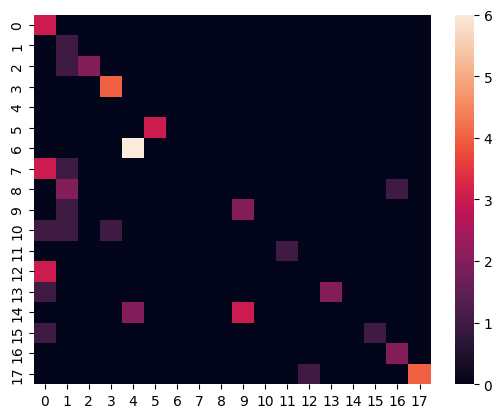

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


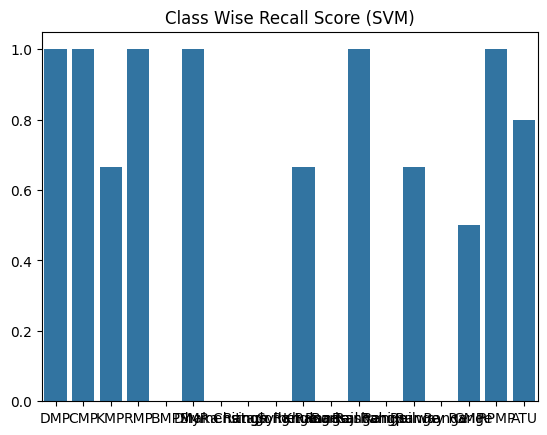

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


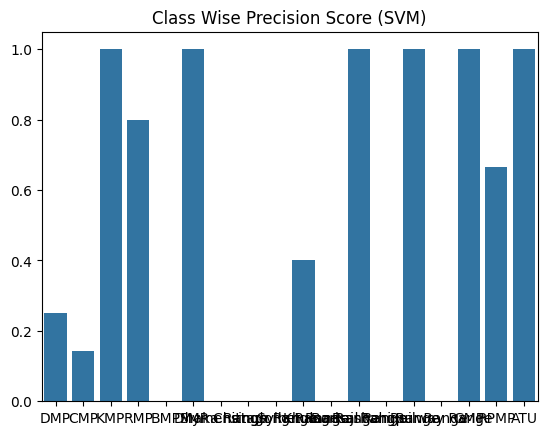

In [25]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

Here accuracy is: 46%

Recall is 1 for DMP, RMP & less then 7 for KMP  etc.

Precision is 1 for KMP & les then 3 for DPM less then 2 for CMP & so on.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         1
           2       0.67      0.67      0.67         3
           3       0.60      0.75      0.67         4
           4       0.00      0.00      0.00         0
           5       0.60      1.00      0.75         3
           6       0.83      0.83      0.83         6
           7       0.00      0.00      0.00         4
           8       0.50      0.33      0.40         3
           9       1.00      0.67      0.80         3
          10       0.00      0.00      0.00         3
          11       0.50      1.00      0.67         1
          12       0.00      0.00      0.00         3
          13       1.00      0.67      0.80         3
          14       1.00      0.60      0.75         5
          15       1.00      0.50      0.67         2
          16       0.33      0.50      0.40         2
          17       1.00    

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\

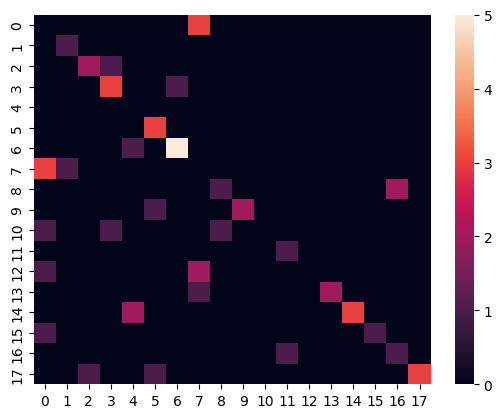

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


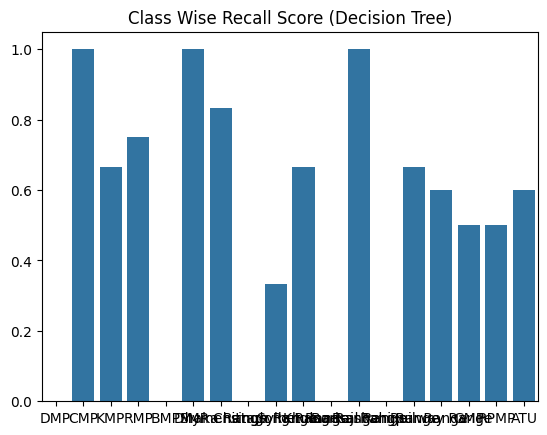

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


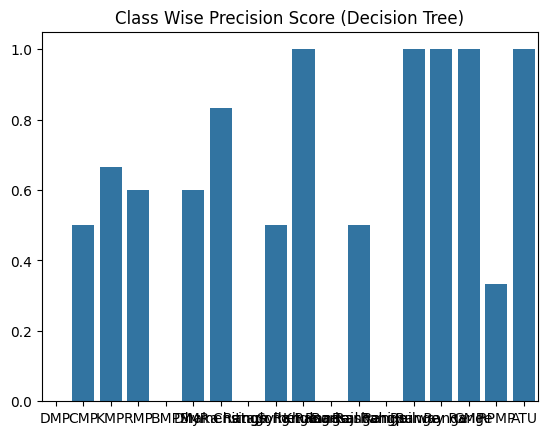

In [26]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

Here accuracy is: 52%


Recall is 1 for CMP & less then 7 for KMP & less then 8 for RMP  etc.

Precision is 5 for CMP, less thne 7 for CMP & so on.
